<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [247]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [248]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [249]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df=pd.read_csv('weight_height.csv')
des=df.describe()
des.loc['Nan']=df.isna().sum()
des.loc['%Nan']=(df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [250]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [251]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [252]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)


In [253]:
df2 = df.copy()

df2['Gender'] = df2.apply(lambda x: 1 if x['Gender'] == 'Male' else 0, axis=1)
df2['Sexo'] = df2.apply(lambda x: 'Masculino' if x['Gender'] == 1 else 'Femenino', axis=1)
df2['Altura']= ((df['Height'].values)*254)/10000
df2['Peso'] = ((df['Weight'].values)*4536)/10000
df2.head()

,Gender,Height,Weight,Sexo,Altura,Peso
0,1,73.847017,241.893563,Masculino,1.875714,109.722920
1,1,68.781904,162.310473,Masculino,1.747060,73.624030
2,1,74.110105,212.740856,Masculino,1.882397,96.499252
3,1,71.730978,220.042470,Masculino,1.821967,99.811265
4,1,69.881796,206.349801,Masculino,1.774998,93.600270


In [254]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

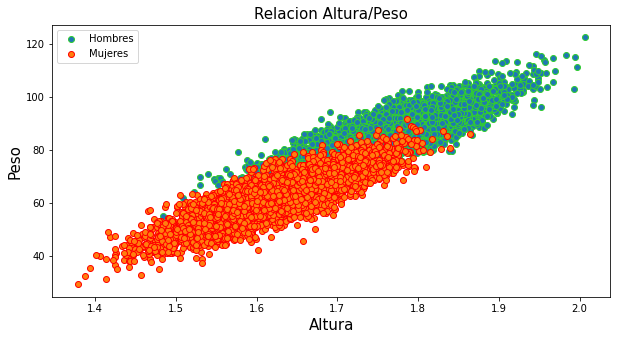

In [324]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
masculino=df2[(df2['Gender']==1)]
femenino=df2[(df2['Gender']==0)]
#fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.set_xlabel('Altura', fontsize=15)
ax.set_ylabel('Peso', fontsize=15)
ax.scatter(x=masculino['Altura'], y=masculino['Peso'], edgecolor='limegreen', label='Hombres')
ax.scatter(x=femenino['Altura'], y=femenino['Peso'], edgecolor='red', label='Mujeres')
plt.title('Relacion Altura/Peso', fontsize=15)
ax.legend()
plt.show()

La altura media de los hombres es: 1.7532691860179224


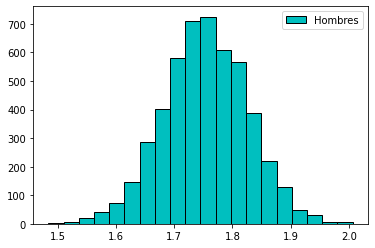

In [256]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
x_m=masculino['Altura']
plt.hist(masculino['Altura'], bins=20, color='c', ec='black', label='Hombres')
plt.legend()
m = x_m.mean()
print('La altura media de los hombres es:', m)

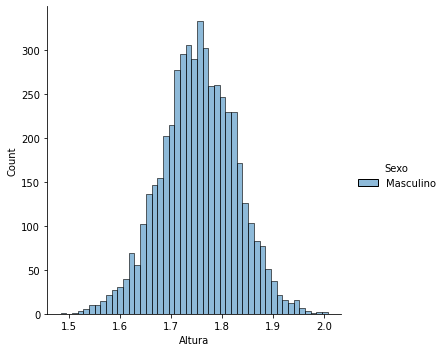

In [257]:
sns.displot(data=masculino, x='Altura', hue='Sexo')

La altura media de las mujeres es: 1.6182028495269967


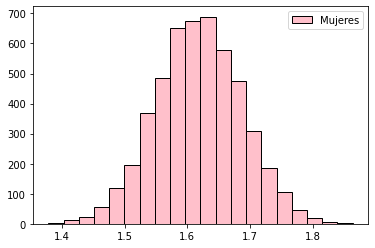

In [258]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
x_f=femenino['Altura']
plt.hist(femenino['Altura'], bins=20, color='pink', ec='black', label='Mujeres')
plt.legend()
m = x_f.mean()
print('La altura media de las mujeres es:', m)

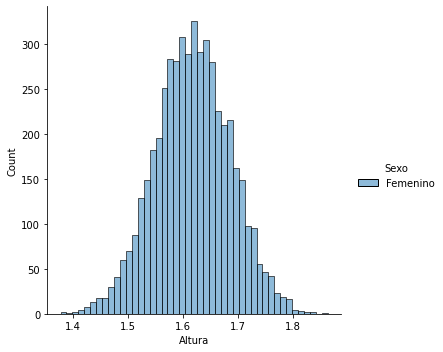

In [259]:
sns.displot(data=femenino, x='Altura', hue='Sexo')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


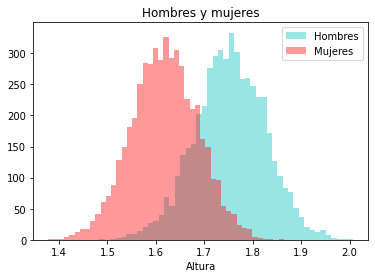

In [260]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
x_m=masculino['Altura']
x_f=femenino['Altura']
sns.distplot(x_m, color='c', kde= False, label='Hombres')
sns.distplot(x_f, color='r', kde= False, label='Mujeres')
plt.title('Hombres y mujeres')
plt.legend()

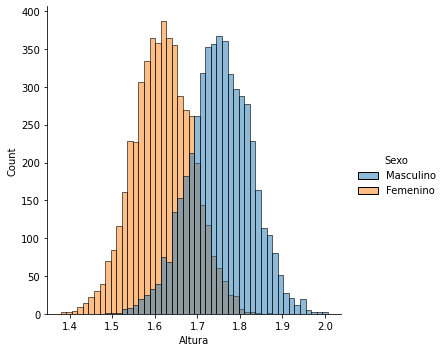

In [261]:
sns.displot(data=df2, x='Altura', hue='Sexo')

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [262]:
# Variable de entrada, peso

In [298]:
X_m=masculino[['Peso']].values
y_m=masculino['Altura'].values
X_f=femenino[['Peso']].values
y_f=femenino['Altura'].values

from sklearn.model_selection import train_test_split

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.3, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.3, random_state=42)



In [299]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_m_train, y_m_train)
y_m_hat= lr.predict(X_m_test)

lr = linear_model.LinearRegression()
lr.fit(X_f_train, y_f_train)
y_f_hat= lr.predict(X_f_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [302]:
from sklearn.metrics import r2_score
value = r2_score(y_m_test, y_m_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.75


In [303]:
from sklearn.metrics import r2_score
value = r2_score(y_f_test, y_f_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.73


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [326]:
X=femenino[['Altura']].values
y=femenino['Peso'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [327]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

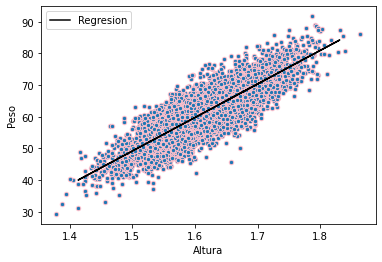

In [328]:
fig = plt.figure()
ax = fig.add_subplot()
femenino.plot.scatter('Altura', 'Peso', edgecolor='pink', ax=ax)
ax.plot(X_test, y_hat, color='black', label="Regresion")
ax.legend()
plt.show()

In [329]:
X=masculino[['Altura']].values
y=masculino['Peso'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [330]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

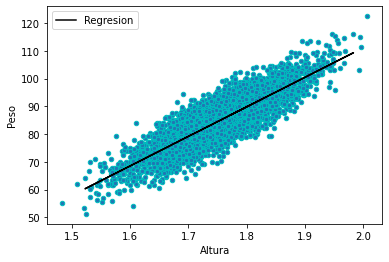

In [334]:
fig = plt.figure()
ax = fig.add_subplot()
masculino.plot.scatter('Altura', 'Peso', edgecolor='c', ax=ax)
ax.plot(X_test, y_hat, color='black', label="Regresion")
ax.legend()
plt.show()